<a href="https://colab.research.google.com/github/taghridyasser/Heart_-disease_detection/blob/main/Copy_of_Heart_final_graduation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [285]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

# Problem statement

With an estimated 17.9 million fatalities annually, or 31% of all deaths worldwide, cardiovascular diseases (CVDs) are the leading cause of death worldwide. Heart attacks and strokes account for four out of every five deaths from CVD, and one-third of these deaths happen too soon among adults under the age of 70. This dataset includes 11 variables that can be used to predict a potential heart illness. Heart disease is a common event caused by CVDs.

A machine learning model can be very helpful in the early detection and management of cardiovascular disease and high cardiovascular risk individuals (due to the existence of one or more risk factors, such as hypertension, diabetes, hyperlipidaemia, or pre-existing disease).

# Read the dataset


In [286]:
df= pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')

In [287]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


# Columns Description


* age : in years

* Sex: 1 = male, 0= female;

* Chest Pain Type: Value 1: typical angina, Value 2: atypical angina ,Value 3: non-anginal pain , Value 4: asymptomatic

* resting bp s: resting blood pressureinmmHg

* cholesterol: serum cholesterol in mg/dl

* Fasting Blood sugar: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* Resting ecg: resting electrocardiogram results: Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* max heart rate:maximum heart rate achieved
(71–202)
* exercise angina:Exercise induced angina : 1 = yes; 0 = no

*  oldpeak =ST :oldpeak

* ST slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
* class: 1 = heart disease, 0 = Normal

# Data Exploration

In [288]:
#show the shape of the data
df.shape

(1190, 12)

In [289]:
# info of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [290]:
#data types off columns
df.dtypes

,0
age,int64
sex,int64
chest pain type,int64
resting bp s,int64
cholesterol,int64
fasting blood sugar,int64
resting ecg,int64
max heart rate,int64
exercise angina,int64
oldpeak,float64


Categorical in terms of their semantics. These features should be converted to string (object) data type for proper analysis and interpretation:

In [291]:
# Define the continuous features
continuous_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

# Convert the identified features to object data type
df[features_to_convert] = df[features_to_convert].astype('object')

df.dtypes

,0
age,int64
sex,object
chest pain type,object
resting bp s,int64
cholesterol,int64
fasting blood sugar,object
resting ecg,object
max heart rate,int64
exercise angina,object
oldpeak,float64


In [292]:
#summary statistics
df.describe()

,age,resting bp s,cholesterol,max heart rate,oldpeak
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,139.732773,0.922773
std,9.358203,18.368823,101.420489,25.517636,1.086337
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,188.000000,121.000000,0.000000
50%,54.000000,130.000000,229.000000,140.500000,0.600000
75%,60.000000,140.000000,269.750000,160.000000,1.600000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [293]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


In [294]:
#if there duplicated
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1185,False
1186,False
1187,False
1188,False


In [295]:
#sum of duplicated
df.duplicated().sum()

272

In [296]:
#drop duplicated
df.drop_duplicates(inplace=True)
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [297]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
resting bp s,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
max heart rate,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


In [298]:
df['target'].value_counts()# indicate that our data is balanced

,count
target,
1,508
0,410


In [299]:
#chech if there is A NULL
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [300]:
df.nunique()

,0
age,50
sex,2
chest pain type,4
resting bp s,67
cholesterol,222
fasting blood sugar,2
resting ecg,3
max heart rate,119
exercise angina,2
oldpeak,53


In [301]:
df['oldpeak'].value_counts()

,count
oldpeak,
0.0,368
1.0,86
2.0,76
1.5,53
3.0,28
1.2,26
0.2,22
0.5,19
1.4,18


# EDA

In [302]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [303]:

sex_count= df['sex'].value_counts().reset_index(name='count') # 1 = male, 0= female;
sex_count

,sex,count
0,1,725
1,0,193


In [304]:
sex_count= df['sex'].value_counts()

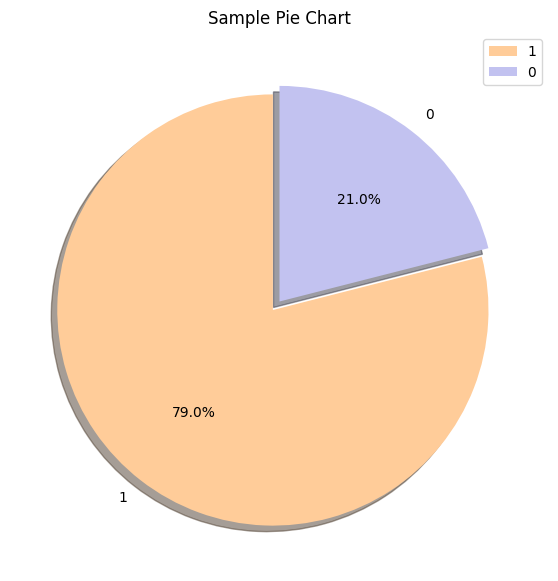

In [305]:
 #Pie chart for HEART DISEASES patients gender percentage
plt.figure(figsize=(7,7))
gender_colors = ['#ffcc99', '#c2c2f0']

plt.tight_layout(pad=10)
plt.pie(x=sex_count, labels=sex_count.index, autopct='%1.1f%%', shadow=True, startangle=90, colors=gender_colors, explode=(0.05, 0.0))
plt.title('Sample Pie Chart')
plt.legend()

plt.show()

# Univariate Analysis:-
For continuous data, histograms are used to explore the distribution of each feature, helping us analyze its central tendency, variability, and overall shape. For categorical data, bar plots are applied to display the frequency of each category, offering a clear view of the relative importance of each category within its feature.

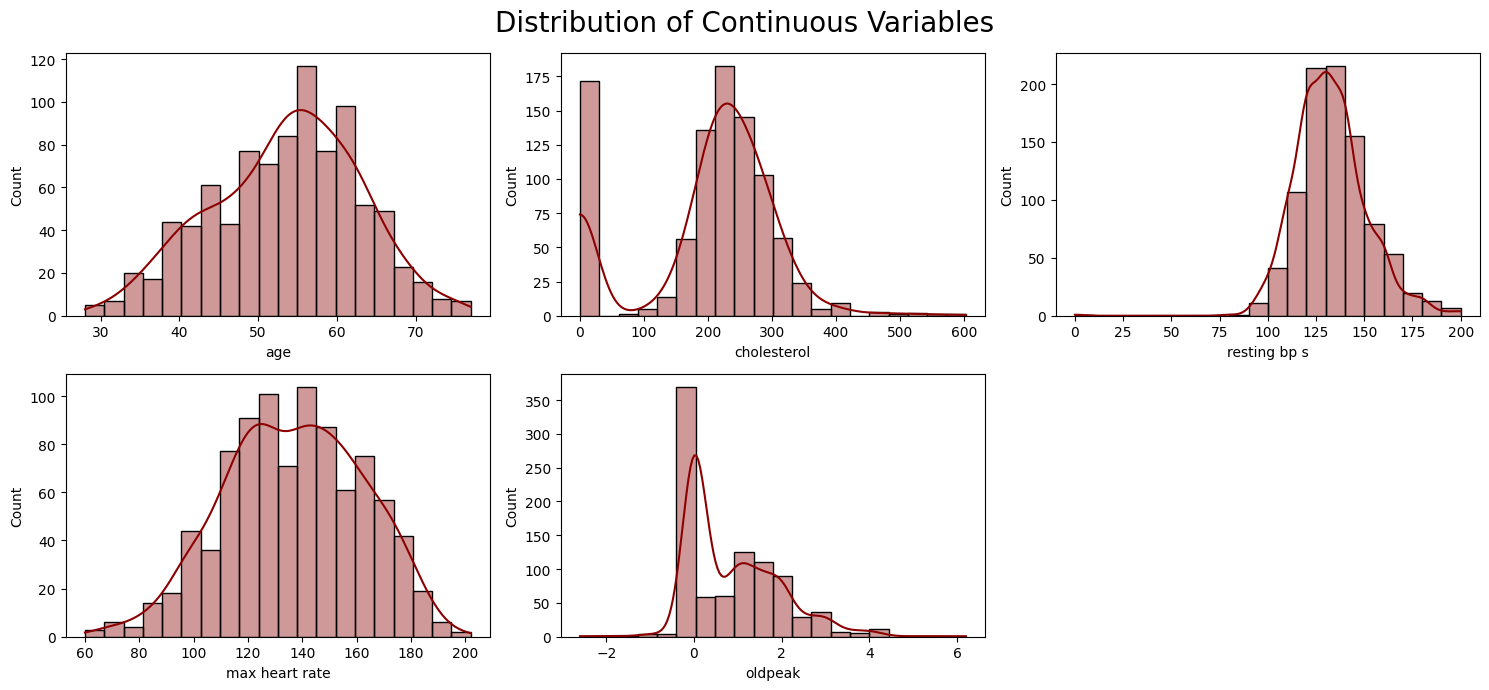

In [306]:
#perform univariate analysis for each variable to show distribution using histogram
num_coulmn=['age','cholesterol','resting bp s','max heart rate','oldpeak']
plt.figure(figsize=(15,7))
for i,col in enumerate(num_coulmn):
     plt.subplot(2,3,i+1)
     hist=sns.histplot(data=df, x=col , kde=True,bins=20,color='#8B0000',alpha=0.4)
     plt.suptitle('Distribution of Continuous Variables', fontsize=20)
     plt.tight_layout()




plt.show()

Categorical Variables Univariate Analysis¶


In [307]:
#maping the categorical features to their meaning
df['chest pain type']=df['chest pain type'].map({1:'typical angina',2:'atypical angina',3:'non-anginal pain',4:'asymptomatic'})
df['sex']=df['sex'].map({1:'male',0:'female'})
df['fasting blood sugar']=df['fasting blood sugar'].map({1:'true',0:'false'})
df['resting ecg']=df['resting ecg'].map({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy '})
df['exercise angina']=df['exercise angina'].map({1:'yes',0:'no'})
df['ST slope']=df['ST slope'].map({1:'upsloping',2:'flat',3:'downsloping'})
df['target']=df['target'].map({1:'heart disease',0:'Normal'})



In [308]:
# Filter out categorical features for the univariate analysis
categorical_features = df.columns.difference(num_coulmn)
df_categorical = df[categorical_features]

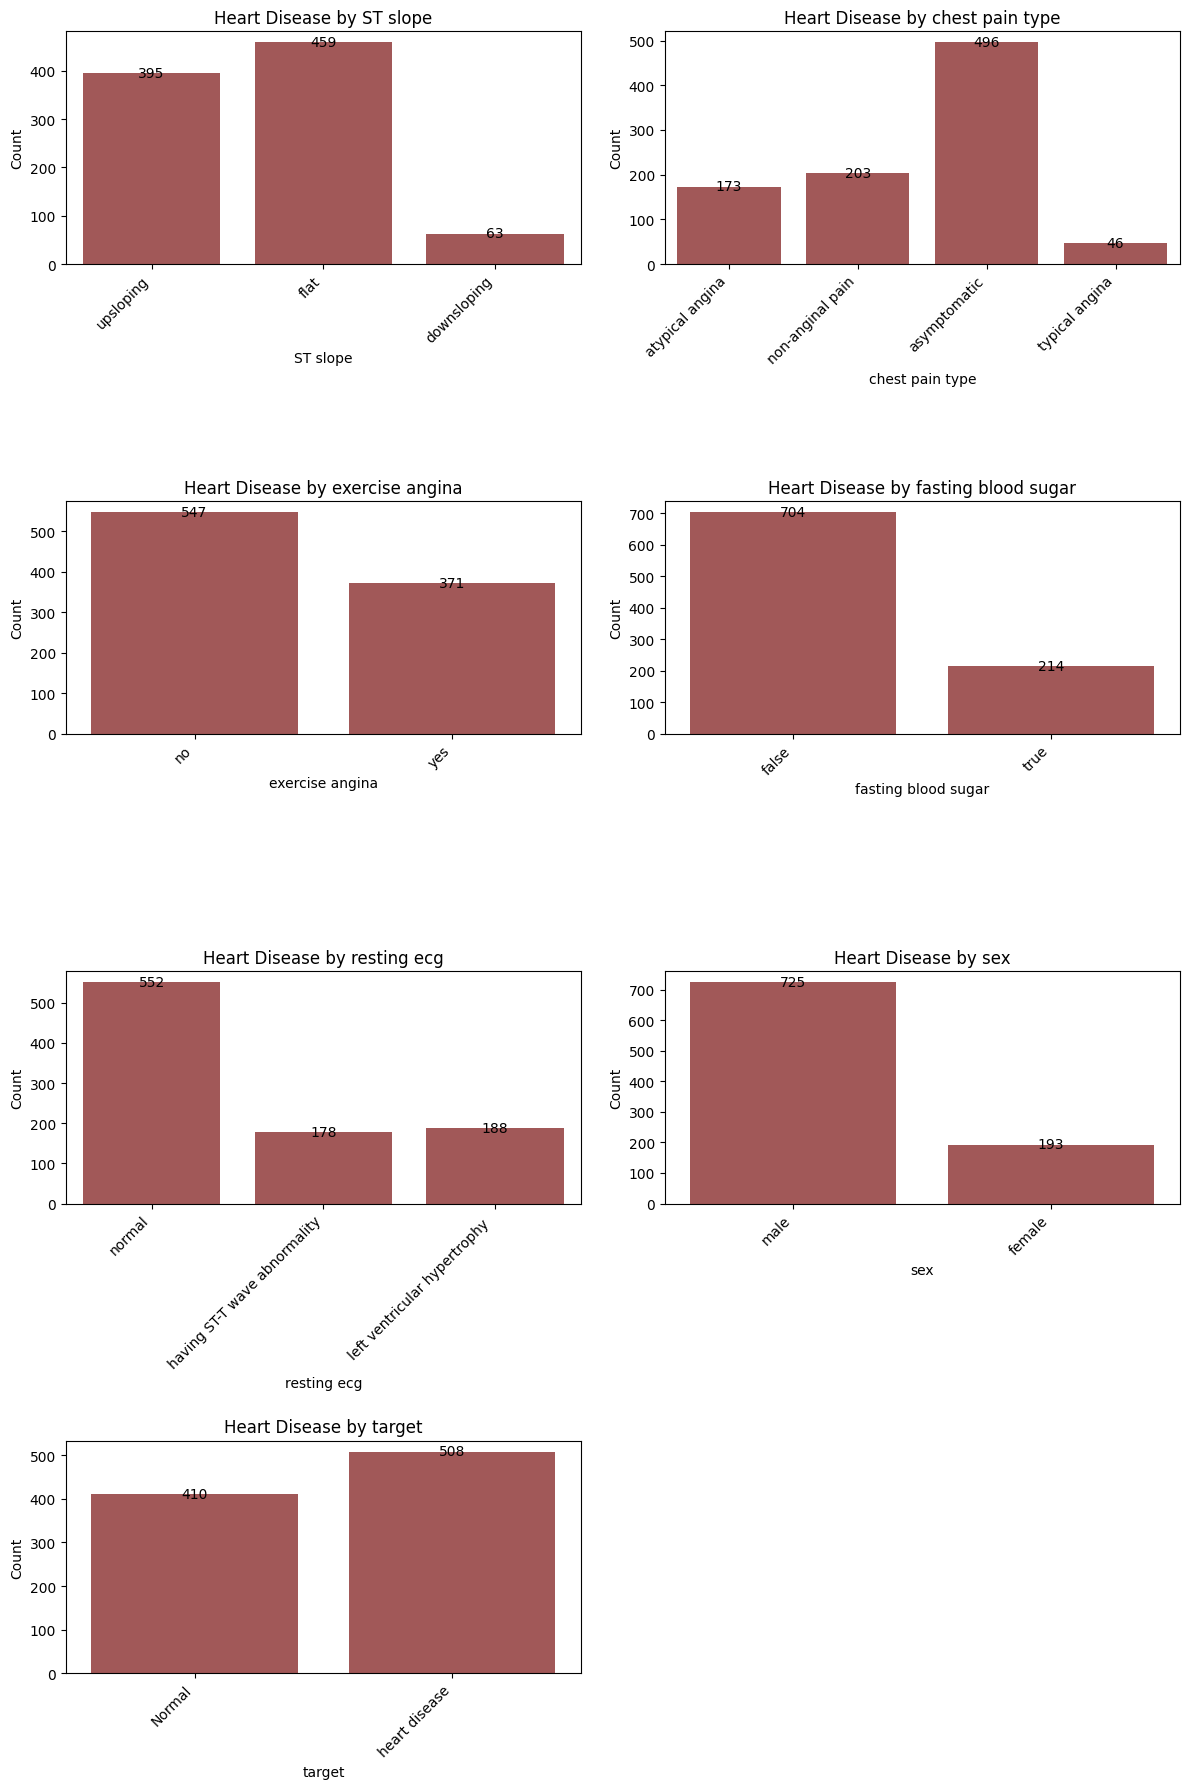

In [309]:
plt.figure(figsize=(12,18))
# Adjust subplot grid to accommodate all categorical features
num_rows = 4  # Increased to 4 rows to accommodate 7 features with 2 columns.
num_cols = 2
for i,col in enumerate(categorical_features):
    # Update subplot index calculation using the adjusted grid
    plt.subplot(num_rows, num_cols, i+1)
    sns.countplot(data = df ,x = col,color='#8B0000',alpha=.7)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Heart Disease by {col}')
    plt.xticks(rotation=45, ha='right')
    #plt.legend(['No Disease','Disease'])


plt.tight_layout(w_pad=2,h_pad=2)
plt.show()

Inferences:
Gender (sex): The dataset is predominantly male, constituting a significant majority.
ST slpoe:



In [310]:
df.groupby('sex').mean(numeric_only=True)

,age,resting bp s,cholesterol,max heart rate,oldpeak
sex,,,,,
female,52.492228,132.212435,241.196891,146.139896,0.668912
male,53.782069,132.445517,187.513103,134.325517,0.945517


# **Bivariate Analysis**
For our bivariate analysis on the dataset's features with respect to the target variable:
For continuous data: I will use bar plots to showcase the average value of each feature for the different target classes, and KDE plots to understand the distribution of each feature across the target classes. This aids in discerning how each feature varies between the two target outcomes.
For categorical data: i will employ 100% stacked bar plots to depict the proportion of each category across the target classes. This offers a comprehensive view of how different categories within a feature relate to the target.
Through these visualization techniques, we are going to gain a deeper understanding of the relationship between individual features and the target, revealing potential predictors for heart disease.

<ipython-input-311-8f9f62988973>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['target'], y=feature, data=df, ax=axes[i, 0], palette=palette, ci=None)
<ipython-input-311-8f9f62988973>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['target'], y=feature, data=df, ax=axes[i, 0], palette=palette, ci=None)
<ipython-input-311-8f9f62988973>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['target'] == category][feature], ax=axes[i, 1], label=f' {category}',palette=palette ,shade=True, fill=True)
<ipython-input-311-8f9f62988973>:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df[df['target'] ==

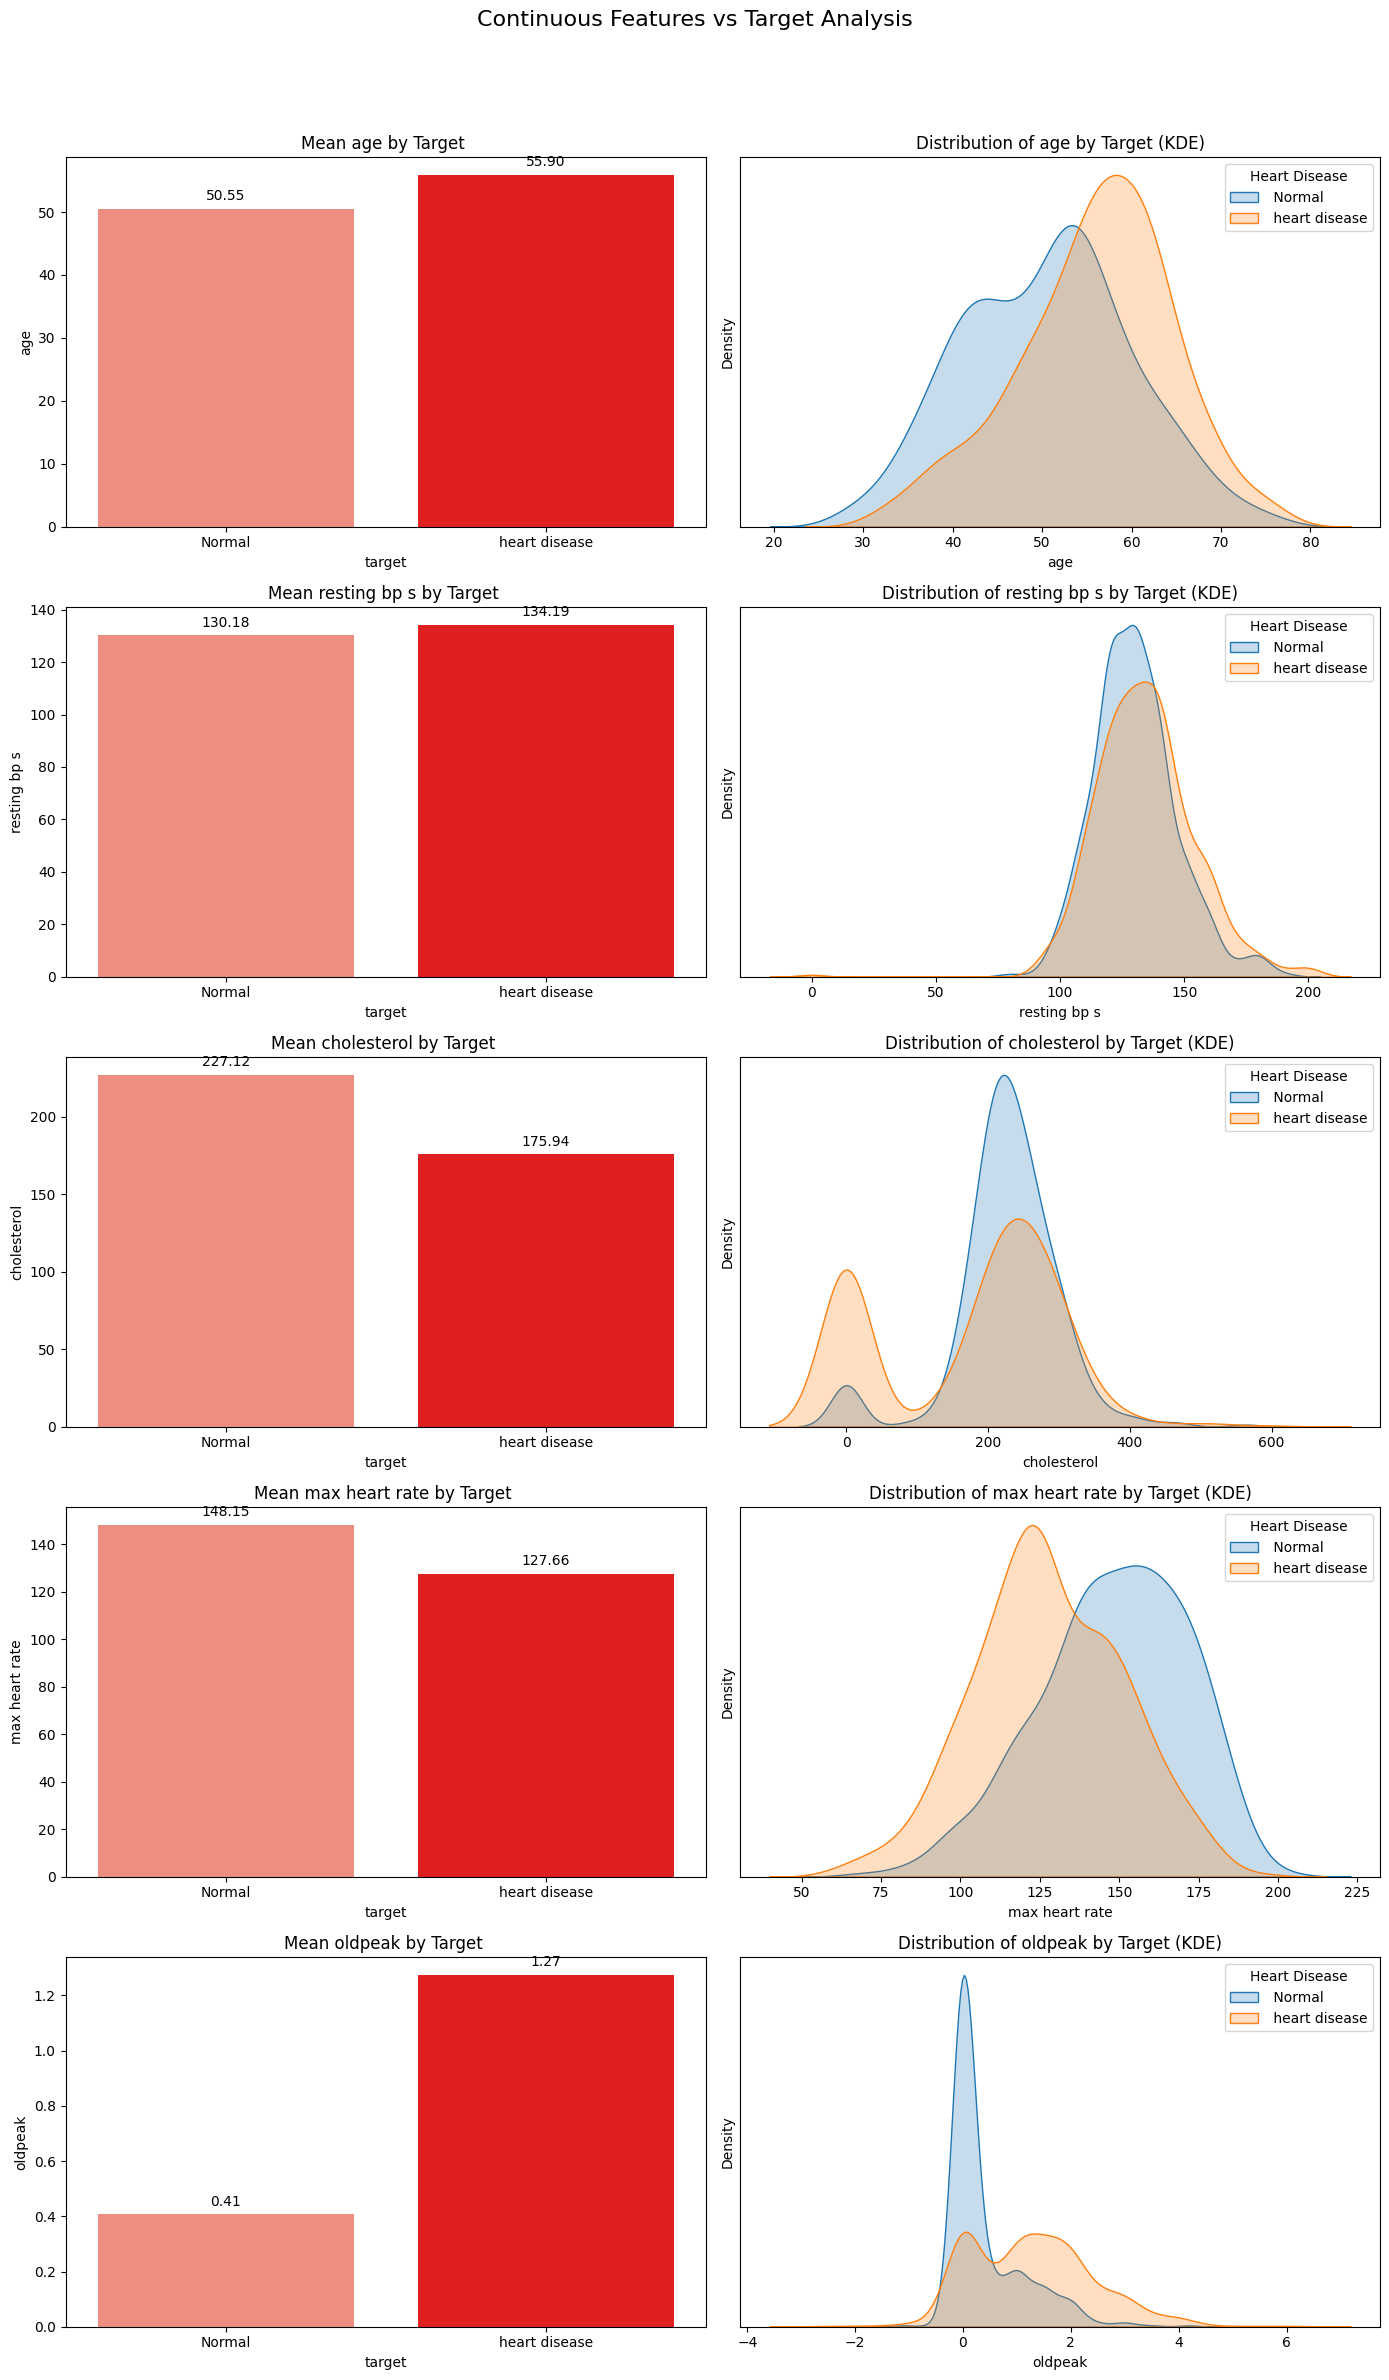

In [311]:
# Set color palette
palette = sns.color_palette(['#ff826e', 'red'])
#sns.set_palette(['#ff826e', 'red'])


# Create the subplots (2 rows, 1 column for each feature)
fig, axes = plt.subplots(len(continuous_features), 2, figsize=(14, 5 * len(continuous_features)))

# Loop through each continuous feature to create barplots and KDE plots
for i, feature in enumerate(continuous_features):

    # Barplot showing the mean value of the feature for each target category
    sns.barplot(x=df['target'], y=feature, data=df, ax=axes[i, 0], palette=palette, ci=None)

    # Add mean values to the barplot using loop
    for p in axes[i, 0].patches:
        axes[i, 0].annotate(format(p.get_height(), '.2f'),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha = 'center', va = 'center',
                            xytext = (0, 9), textcoords = 'offset points')

    # KDE plot showing the distribution of the feature for each target category
    for category in df['target'].unique():
        sns.kdeplot(df[df['target'] == category][feature], ax=axes[i, 1], label=f' {category}',palette=palette ,shade=True, fill=True)

    # Set titles for each row of subplots
    axes[i, 0].set_title(f'Mean {feature} by Target ', fontsize=12)
    axes[i, 1].set_title(f'Distribution of {feature} by Target (KDE)', fontsize=12)
    axes[i,1].set_yticks([])
    axes[i,1].legend(title='Heart Disease', loc='upper right')


# Set the title for the entire figure
fig.suptitle('Continuous Features vs Target Analysis', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Inferences**:
Age : The distributions show a slight shift with patients having heart disease being a bit older on average than those without. The mean age for patient heart disease is higher.

Resting Blood Pressure (trestbps): The KDE plot of both groups shows overlapping distributions with almost equal mean values, suggesting that this feature has little ability to differentiate between them.

Serum cholesterol (chol): Patients with heart disease had slightly lower mean cholesterol levels than those without the condition, but the distributions of cholesterol levels for the two groups are rather similar.

Maximum Heart Rate recorded (thalach): The distributions differ significantly.   During stress testing, patients with heart diseases typically reach a higher maximum heart rate than individuals without the condition.

ST Depression (oldpeak): The ST depression induced by exercise relative to rest is notably lower for patients with heart disease. oldpeak could be a critical feature, where:
Higher values increase the likelihood of a positive diagnosis for heart disease.
Lower values suggest a healthier cardiovascular system.




**Categorical Features vs Target¶**

In [312]:
# Remove 'target' from the categorical_features
categorical_features = [feature for feature in categorical_features if feature != 'target']


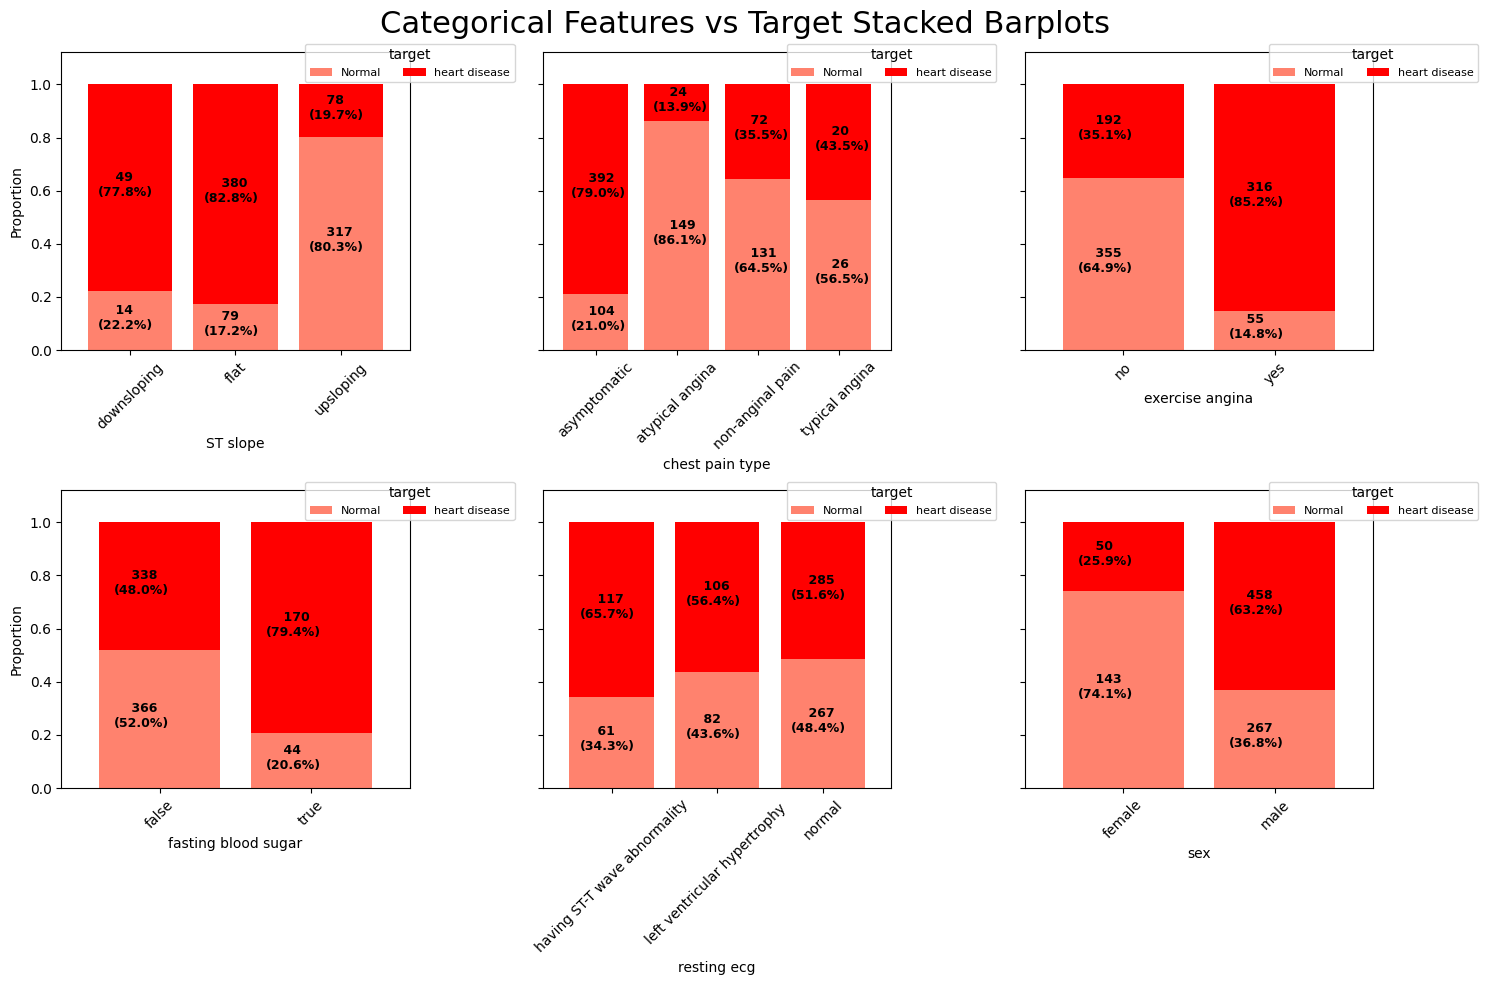

In [313]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
for i,col in enumerate(categorical_features):
  cross_tab = pd.crosstab(index=df[col], columns=df['target'])
  # Using the normalize=True argument gives us the index-wise proportion of the data
  cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')
  # Define colormap
  cmp = ListedColormap(['#ff826e', 'red'])
  # Plot stacked bar charts
  x, y = i//3, i%3
  cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
  # Add the proportions and counts of the individual bars to our plot
  for idx, val in enumerate([*cross_tab.index.values]):
      for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
        ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03, s = f'    {count}\n({np.round(proportion * 100, 1)}%)',color = "black", fontsize=9, fontweight="bold")
  # Add legend
  ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
  ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
  ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=45)
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()








Chest Pain Type : Different types of chest pain present varied proportions of heart disease. Notably, types 1, 2, and 3 have a higher proportion of heart disease presence compared to type 0. This suggests the type of chest pain can be influential in predicting the disease.

**Step 5 | Data Preprocessing**

Step 5.1 Features importance:
all features in the dataset appear to be relevant based on our EDA. No columns seem redundant or irrelevant. Thus, we'll retain all features, ensuring no valuable information is lost, especially given the dataset's small size.

**Step 5.2 | Missing Value Treatment**

In [314]:
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [315]:
df[df['ST slope'].isnull()]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
517,68,male,non-anginal pain,150,195,true,normal,132,no,0.0,NaN,heart disease


In [316]:
print(df['ST slope'].value_counts())


ST slope
flat           459
upsloping      395
downsloping     63
Name: count, dtype: int64


In [317]:
# Fill with the most frequent value (mode) as ST slope is  categorical attribute.
mode_value = df['ST slope'].mode()[0]  # Get the most frequent value
df['ST slope'].fillna(mode_value, inplace=True)


<ipython-input-317-6f7e9b9fd33b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ST slope'].fillna(mode_value, inplace=True)


In [318]:
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


**Step 5.3 | Outlier Treatment**

 Checking for outliers using the IQR method for the continuous features:



In [319]:
continuous_features

['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

In [320]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

,0
age,0
resting bp s,28
cholesterol,183
max heart rate,2
oldpeak,16


there is outliers lets check it on b

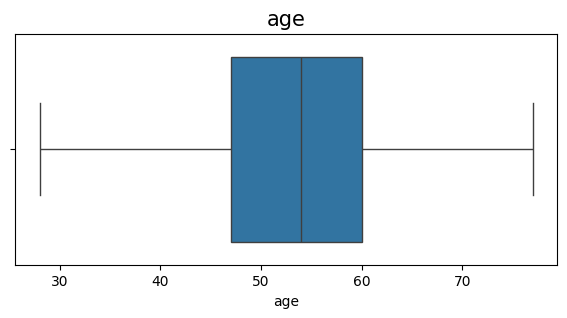

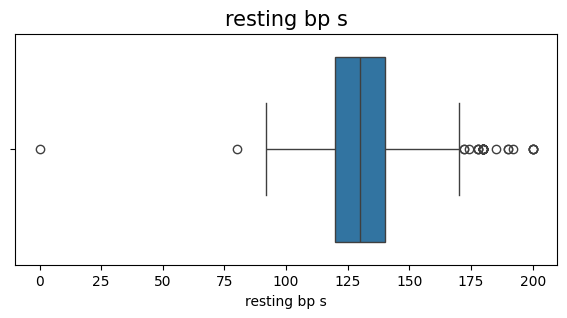

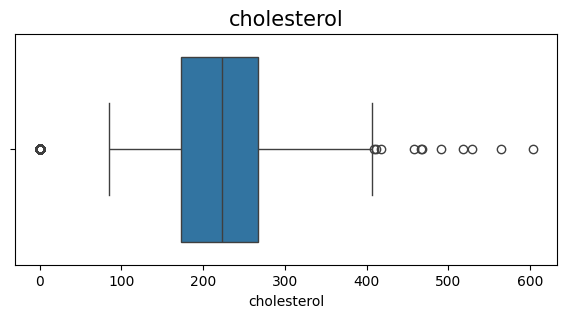

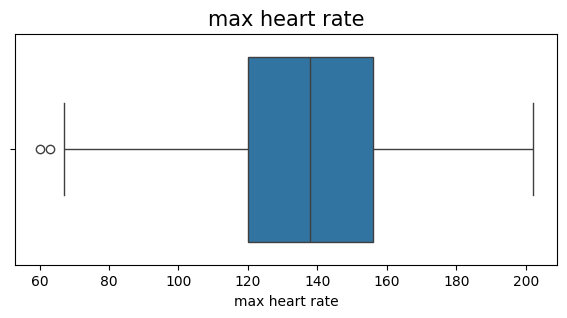

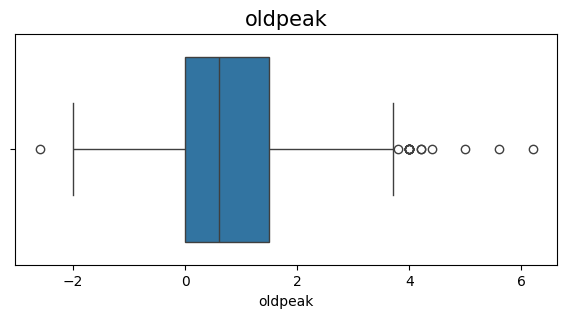

In [321]:
# checking the outliers in each column
for col in continuous_features:

    fig, ax = plt.subplots(figsize=(7, 3))

    sns.boxplot(x=df[col], ax=ax)

    ax.set_title(col, fontsize=15)

    plt.show()


In [322]:
df['cholesterol'].value_counts()


,count
cholesterol,
0,172
254,11
223,10
220,10
230,9
...,...
392,1
316,1
153,1


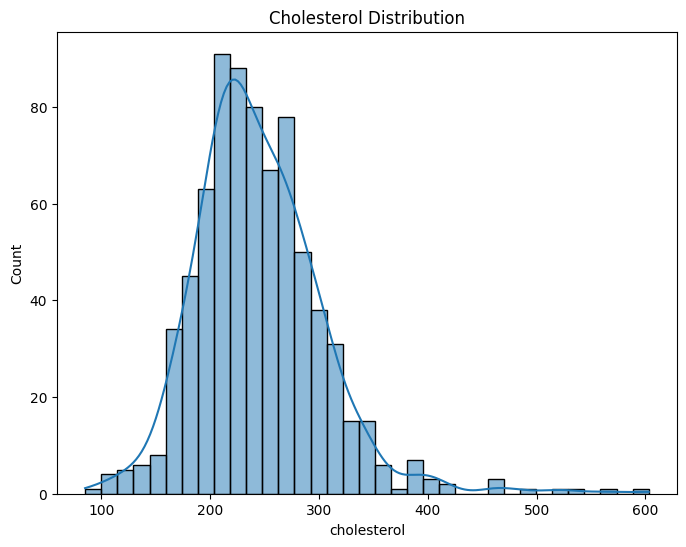

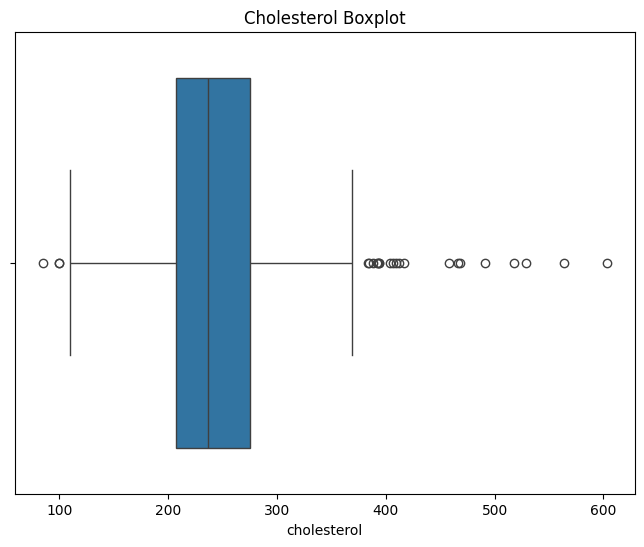

In [323]:

# Plot histogram to visualize distribution
plt.figure(figsize=(8,6))
sns.histplot(df['cholesterol'][df['cholesterol'] != 0], kde=True)#Excluding zeros (or any invalid entries) when visualizing the distribution helps ensure that the analysis accurately reflects the underlying data characteristics
plt.title('Cholesterol Distribution')
plt.show()

# Boxplot for visualizing outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=df['cholesterol'][df['cholesterol'] != 0])
plt.title('Cholesterol Boxplot')
plt.show()


In [324]:
#Replace cholesterol values of 0 with the median as the distribution is skwed
cholesterol_median = df['cholesterol'][df['cholesterol'] != 0].median()
df['cholesterol'] = np.where(df['cholesterol'] == 0, cholesterol_median, df['cholesterol'])

<Axes: xlabel='cholesterol', ylabel='Count'>

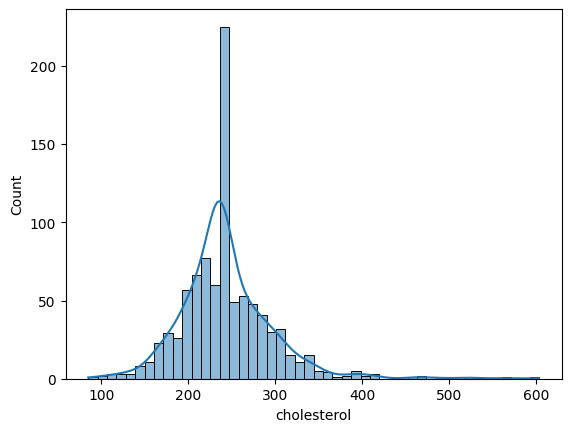

In [325]:
sns.histplot(df['cholesterol'], kde=True)


In [326]:
#investegate if the 603 is normal for patient affected by Heart disease or not ?
df[df['cholesterol']== 603]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
149,54,male,asymptomatic,130,603.0,true,normal,125,yes,1.0,flat,heart disease


It appears that the other outliers are normal values and cannot be deleted because they may affect the efficiency of the model


In [327]:
df['resting bp s'].value_counts()


,count
resting bp s,
120,132
130,118
140,107
110,58
150,55
...,...
185,1
98,1
92,1


In [328]:
df[df['resting bp s']== 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
450,55,male,non-anginal pain,0,237.0,false,normal,155,no,1.5,flat,heart disease


it may be incorreect entry for resting blood pressure so impute it with median

<Axes: xlabel='resting bp s', ylabel='Count'>

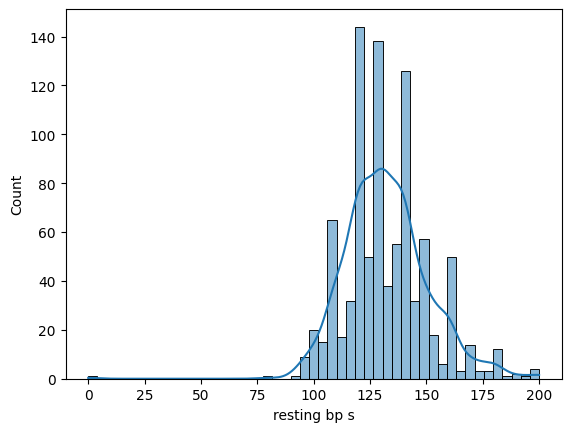

In [329]:
sns.histplot(df['resting bp s'], kde=True)


In [330]:
resting_bp_median = df['resting bp s'][df['resting bp s'] > 0].median()
df.loc[df['resting bp s'] == 0, 'resting bp s'] = resting_bp_median

<Axes: xlabel='resting bp s', ylabel='Count'>

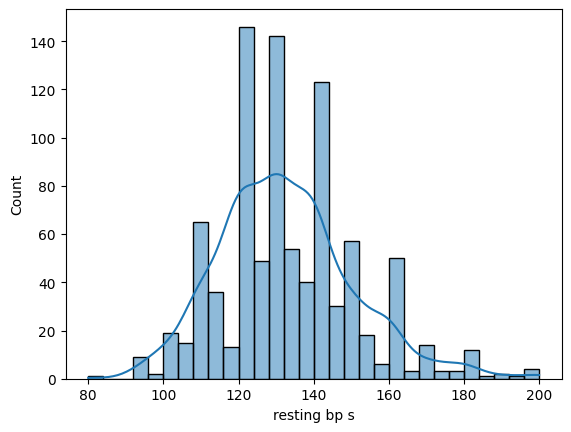

In [331]:
sns.histplot(df['resting bp s'], kde=True)


**Step 5.4 | Categorical Features Encoding¶**

In [332]:
# Define feature types
from sklearn.preprocessing import LabelEncoder
numeric_features = ['age', 'cholesterol', 'max heart rate', 'oldpeak', 'resting bp s']
ordinal_features = ['chest pain type', 'resting ecg']
nominal_features = ['sex', 'fasting blood sugar', 'exercise angina', 'ST slope']

# Split data
x = df.drop(columns=['target'])  # Features
y = df['target']  # Target
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y) # Encode target to 0 and 1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [333]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('ord', OrdinalEncoder(), ordinal_features),
        ('nom', OneHotEncoder(), nominal_features)
    ]
)

In [334]:
print(df.columns)
print(x_train.columns)

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')
Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope'],
      dtype='object')


In [335]:
# Models and hyperparameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}
param_grids = {
    'Logistic Regression': {'model__C': [0.01, 0.1, 1, 10]},
    'Random Forest': {'model__n_estimators': [50, 100, 200]},
    'Decision Tree': {'model__max_depth': [None, 10, 20]},
    'SVM': {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']},
    'KNN': {'model__n_neighbors': [3, 5, 7]},
    'XGBoost': {'model__n_estimators': [100, 200, 300],
                'model__learning_rate': [0.01, 0.1, 0.2]
                }
}

# Iterate through models
best_model = None
best_accuracy = 0
best_name = ""
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='recall', n_jobs=-1)
    grid_search.fit(x_train, y_train)

    # Evaluate
    y_pred = grid_search.best_estimator_.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = grid_search.best_estimator_
        best_name = name

print(f"Best Model: {best_name} with accuracy {best_accuracy:.4f}")


Logistic Regression: 0.8533
Random Forest: 0.8587
Decision Tree: 0.7935
SVM: 0.8370
KNN: 0.8424
XGBoost: 0.8804
Best Model: XGBoost with accuracy 0.8804


In [336]:
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-score: {test_f1:.4f}")

Test Accuracy: 0.8804
Test Precision: 0.9293
Test Recall: 0.8598
Test F1-score: 0.8932


In [337]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score

In [338]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score


# Updated XGBoost hyperparameter tuning
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42) # Add random_state for reproducibility

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('xgb_model', xgb_model)])

param_grid = {
    'xgb_model__n_estimators': [100, 200,300, 500, 1000],
    'xgb_model__learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2],





}


grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Best Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
XGBoost Best Accuracy: 0.8804
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        77
           1       0.93      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184

Best Parameters: {'xgb_model__learning_rate': 0.01, 'xgb_model__n_estimators': 100}


In [339]:
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        77
           1       0.93      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184



In [340]:
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-score: {test_f1:.4f}")

Test Accuracy: 0.8804
Test Precision: 0.9293
Test Recall: 0.8598
Test F1-score: 0.8932


In [341]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score


# Updated XGBoost hyperparameter tuning
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42) # Add random_state for reproducibility

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('xgb_model', xgb_model)])

param_grid = {
    'xgb_model__n_estimators': [100, 200,300, 500, 1000],
    'xgb_model__learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2],





}


grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Best Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
XGBoost Best Accuracy: 0.8804
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        77
           1       0.93      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184

Best Parameters: {'xgb_model__learning_rate': 0.01, 'xgb_model__n_estimators': 100}


In [342]:
# Set the best hyperparameters
best_hyperparameters = {
    'xgb_model__learning_rate': 0.01, 'xgb_model__n_estimators': 100
}
# Update the pipeline with the best hyperparameters
pipeline.set_params(**best_hyperparameters)

# Train the final model on the entire training dataset
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'cholesterol',
                                                   'max heart rate', 'oldpeak',
                                                   'resting bp s']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['chest pain type',
                                                   'resting ecg']),
                                                 ('nom', OneHotEncoder(),
                                                  ['sex', 'fasting blood sugar',
                                                   'exercise angina',
                                                   'ST slope'])])),
                ('xgb_model',
                 XGBClassifier(base_score=None, booster=None, callbac...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [343]:
y_pred_test = pipeline.predict(x_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-score: {test_f1:.4f}")

Test Accuracy: 0.8804
Test Precision: 0.9293
Test Recall: 0.8598
Test F1-score: 0.8932


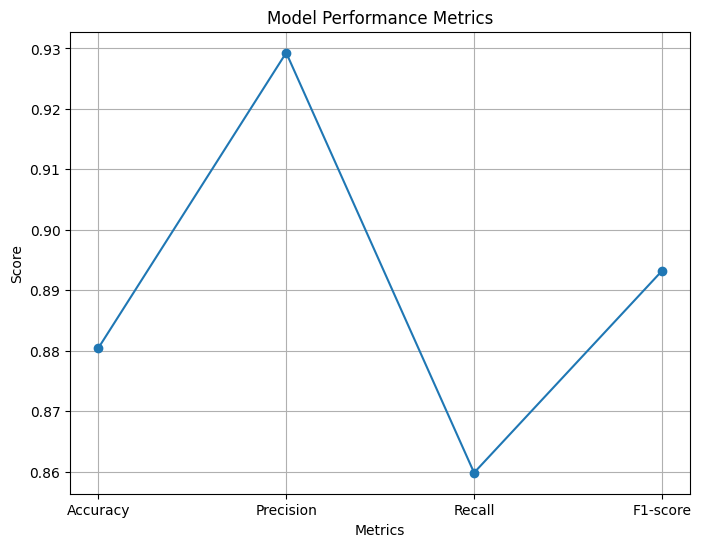

In [344]:

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [test_accuracy, test_precision, test_recall, test_f1]

plt.figure(figsize=(8, 6))
plt.plot(metrics, scores, marker='o', linestyle='-')
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [345]:
joblib.dump(pipeline, 'best_xgb_model_pipeline.pkl')

['best_xgb_model_pipeline.pkl']

In [346]:
loaded_model= joblib.load('best_xgb_model_pipeline.pkl')

In [347]:
loaded_model.n_features_in_


11

In [348]:
loaded_model.feature_names_in_

array(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope'], dtype=object)

In [349]:
# Define a new data point (raw format) with correct categorical representations
new_data_point = pd.DataFrame([{
    'age': 90,
    'cholesterol': 289,
    'max heart rate': 140,
    'oldpeak': 1.5,
    'resting bp s': 140,
    'chest pain type': 'typical angina',  # Use the actual category label (string)
    'resting ecg': 'left ventricular hypertrophy ',  # Use the actual category label (string)
    'sex': 'female',  # Use the actual category label (string)
    'fasting blood sugar': 'true',  # Use the actual category label (string)
    'exercise angina': 'yes',  # Use the actual category label (string)
    'ST slope': 'upsloping'  # Use the actual category label (string)
}])

# Make predictions using the loaded model
prediction = loaded_model.predict(new_data_point)

# Display the prediction
print("Prediction:", prediction)
if prediction[0] == 0:
    print('The patient does not have heart disease.')
else:
    print('The patient has heart disease.')

Prediction: [0]
The patient does not have heart disease.
